# Data Visualization (with Seaborn)

### Helpful Ressources
There are different libraries for data visualization in Python. The most popular ones are "Matplotlib", "Seaborn" and "Plotly"/"Plotly Express". In this notebook, we will focus on Seaborn.

- Seaborn plotting examples: https://seaborn.pydata.org/examples/index.html
- Matplotlib plotting examples: https://matplotlib.org/stable/gallery/index.html
- Plotly/Plotly Express plotting examples: https://plotly.com/python/

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Preprocessing Data (optional)

The raw data from [kaggle](https://www.kaggle.com/datasets/usdot/flight-delays/?select=flights.csv) is preprocessed to get a smaller and more manageable dataset. The amount of data will be limited to January of 2015 and multiple columns will be dropped. The names of the airlines and airports will be added to the dataset.

In [31]:
# Load raw data
raw_flights_df = pd.read_csv('https://nextcloud.dhbw-stuttgart.de/index.php/s/cNYei9Km448JoBT/download')
airports_df = pd.read_csv('data/airports.csv')
airlines_df = pd.read_csv('data/airlines.csv')

raw_flights_df.head()

C:\Users\koepcke\AppData\Local\Temp\ipykernel_8856\3531490895.py:2: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_flights_df = pd.read_csv('https://nextcloud.dhbw-stuttgart.de/index.php/s/cNYei9Km448JoBT/download')


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
raw_flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [33]:
raw_flights_df.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

Save flights of January 2015 (no cancelled or diverted flights) in a new variable and drop not needed columns.

In [34]:
flights_df = raw_flights_df[(raw_flights_df["MONTH"] == 1) & (raw_flights_df["DIVERTED"] == 0) & (raw_flights_df["CANCELLED"] == 0)].copy()

flights_df = flights_df.drop(columns=['YEAR', 'MONTH', 'TAXI_OUT','FLIGHT_NUMBER',
       'TAIL_NUMBER', 'DEPARTURE_TIME','WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME',
       'WHEELS_ON', 'TAXI_IN', 'ARRIVAL_TIME','DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'])

In [35]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 457013 entries, 0 to 469967
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   DAY                  457013 non-null  int64  
 1   DAY_OF_WEEK          457013 non-null  int64  
 2   AIRLINE              457013 non-null  object 
 3   ORIGIN_AIRPORT       457013 non-null  object 
 4   DESTINATION_AIRPORT  457013 non-null  object 
 5   SCHEDULED_DEPARTURE  457013 non-null  int64  
 6   DEPARTURE_DELAY      457013 non-null  float64
 7   DISTANCE             457013 non-null  int64  
 8   SCHEDULED_ARRIVAL    457013 non-null  int64  
 9   ARRIVAL_DELAY        457013 non-null  float64
dtypes: float64(2), int64(5), object(3)
memory usage: 38.4+ MB


In [36]:
flights_df

,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY
0,1,4,AS,ANC,SEA,5,-11.0,1448,430,-22.0
1,1,4,AA,LAX,PBI,10,-8.0,2330,750,-9.0
2,1,4,US,SFO,CLT,20,-2.0,2296,806,5.0
3,1,4,AA,LAX,MIA,20,-5.0,2342,805,-9.0
4,1,4,AS,SEA,ANC,25,-1.0,1448,320,-21.0
...,...,...,...,...,...,...,...,...,...,...
469963,31,6,B6,JFK,BQN,2359,0.0,1576,440,-21.0
469964,31,6,DL,SEA,DTW,2359,0.0,1927,711,-13.0
469965,31,6,F9,DEN,TPA,2359,3.0,1506,511,23.0
469966,31,6,F9,DEN,ATL,2359,0.0,1199,441,29.0


Replace the abbreviation of the airlines and airports with the full name.

In [37]:
# airports
airport_mapping = airports_df[["IATA_CODE","AIRPORT"]].copy()
airport_mapping.set_index("IATA_CODE", inplace=True)

# create dictionary of airport mapping
airport_mapping_dict = airport_mapping.to_dict()
airport_mapping_dict

{'AIRPORT': {'ABE': 'Lehigh Valley International Airport',
  'ABI': 'Abilene Regional Airport',
  'ABQ': 'Albuquerque International Sunport',
  'ABR': 'Aberdeen Regional Airport',
  'ABY': 'Southwest Georgia Regional Airport',
  'ACK': 'Nantucket Memorial Airport',
  'ACT': 'Waco Regional Airport',
  'ACV': 'Arcata Airport',
  'ACY': 'Atlantic City International Airport',
  'ADK': 'Adak Airport',
  'ADQ': 'Kodiak Airport',
  'AEX': 'Alexandria International Airport',
  'AGS': 'Augusta Regional Airport\xa0(Bush Field)',
  'AKN': 'King Salmon Airport',
  'ALB': 'Albany International Airport',
  'ALO': 'Waterloo Regional Airport',
  'AMA': 'Rick Husband Amarillo International Airport',
  'ANC': 'Ted Stevens Anchorage International Airport',
  'APN': 'Alpena County Regional Airport',
  'ASE': 'Aspen-Pitkin County Airport',
  'ATL': 'Hartsfield-Jackson Atlanta International Airport',
  'ATW': 'Appleton International Airport',
  'AUS': 'Austin-Bergstrom International Airport',
  'AVL': 'Ashe

In [38]:
# airlines
airlines_mapping = airlines_df[["IATA_CODE","AIRLINE"]].copy()
airlines_mapping.set_index("IATA_CODE", inplace=True)

airlines_mapping_dict = airlines_mapping.to_dict()
airlines_mapping_dict

{'AIRLINE': {'UA': 'United Air Lines Inc.',
  'AA': 'American Airlines Inc.',
  'US': 'US Airways Inc.',
  'F9': 'Frontier Airlines Inc.',
  'B6': 'JetBlue Airways',
  'OO': 'Skywest Airlines Inc.',
  'AS': 'Alaska Airlines Inc.',
  'NK': 'Spirit Air Lines',
  'WN': 'Southwest Airlines Co.',
  'DL': 'Delta Air Lines Inc.',
  'EV': 'Atlantic Southeast Airlines',
  'HA': 'Hawaiian Airlines Inc.',
  'MQ': 'American Eagle Airlines Inc.',
  'VX': 'Virgin America'}}

In [39]:
# map airport and airline codes to names
flights_df["ORIGIN_AIRPORT_FULL_NAME"] = flights_df["ORIGIN_AIRPORT"].map(airport_mapping_dict["AIRPORT"])
flights_df["DESTINATION_AIRPORT_FULL_NAME"] = flights_df["DESTINATION_AIRPORT"].map(airport_mapping_dict["AIRPORT"])
flights_df["AIRLINE_FULL_NAME"] = flights_df["AIRLINE"].map(airlines_mapping_dict["AIRLINE"])

flights_df.head()

,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,ORIGIN_AIRPORT_FULL_NAME,DESTINATION_AIRPORT_FULL_NAME,AIRLINE_FULL_NAME
0,1,4,AS,ANC,SEA,5,-11.0,1448,430,-22.0,Ted Stevens Anchorage International Airport,Seattle-Tacoma International Airport,Alaska Airlines Inc.
1,1,4,AA,LAX,PBI,10,-8.0,2330,750,-9.0,Los Angeles International Airport,Palm Beach International Airport,American Airlines Inc.
2,1,4,US,SFO,CLT,20,-2.0,2296,806,5.0,San Francisco International Airport,Charlotte Douglas International Airport,US Airways Inc.
3,1,4,AA,LAX,MIA,20,-5.0,2342,805,-9.0,Los Angeles International Airport,Miami International Airport,American Airlines Inc.
4,1,4,AS,SEA,ANC,25,-1.0,1448,320,-21.0,Seattle-Tacoma International Airport,Ted Stevens Anchorage International Airport,Alaska Airlines Inc.


In [40]:
# clean dataframe
flights_df = flights_df.drop(columns=["ORIGIN_AIRPORT","DESTINATION_AIRPORT","AIRLINE"])
flights_df = flights_df.rename(columns={"ORIGIN_AIRPORT_FULL_NAME":"ORIGIN_AIRPORT","DESTINATION_AIRPORT_FULL_NAME":"DESTINATION_AIRPORT","AIRLINE_FULL_NAME":"AIRLINE"})

flights_df.head()

,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,ORIGIN_AIRPORT,DESTINATION_AIRPORT,AIRLINE
0,1,4,5,-11.0,1448,430,-22.0,Ted Stevens Anchorage International Airport,Seattle-Tacoma International Airport,Alaska Airlines Inc.
1,1,4,10,-8.0,2330,750,-9.0,Los Angeles International Airport,Palm Beach International Airport,American Airlines Inc.
2,1,4,20,-2.0,2296,806,5.0,San Francisco International Airport,Charlotte Douglas International Airport,US Airways Inc.
3,1,4,20,-5.0,2342,805,-9.0,Los Angeles International Airport,Miami International Airport,American Airlines Inc.
4,1,4,25,-1.0,1448,320,-21.0,Seattle-Tacoma International Airport,Ted Stevens Anchorage International Airport,Alaska Airlines Inc.


In [41]:
# save cleaned dataframe
# flights_df.to_csv("data/flights_cleaned.csv", index=False)
flights_df.reset_index(drop=True).to_feather("data/flights_cleaned.feather")

### Clean Data

In [42]:
# flights_df = pd.read_csv("data/flights_cleaned.csv")
flights_df = pd.read_feather("data/flights_cleaned.feather")

flights_df.head(5)

,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,ORIGIN_AIRPORT,DESTINATION_AIRPORT,AIRLINE
0,1,4,5,-11.0,1448,430,-22.0,Ted Stevens Anchorage International Airport,Seattle-Tacoma International Airport,Alaska Airlines Inc.
1,1,4,10,-8.0,2330,750,-9.0,Los Angeles International Airport,Palm Beach International Airport,American Airlines Inc.
2,1,4,20,-2.0,2296,806,5.0,San Francisco International Airport,Charlotte Douglas International Airport,US Airways Inc.
3,1,4,20,-5.0,2342,805,-9.0,Los Angeles International Airport,Miami International Airport,American Airlines Inc.
4,1,4,25,-1.0,1448,320,-21.0,Seattle-Tacoma International Airport,Ted Stevens Anchorage International Airport,Alaska Airlines Inc.


First, we check if there are any missing values in the dataset. If there are any, we can either drop the rows or fill them with a value.

In [43]:
flights_df.isnull().sum()

DAY                    0
DAY_OF_WEEK            0
SCHEDULED_DEPARTURE    0
DEPARTURE_DELAY        0
DISTANCE               0
SCHEDULED_ARRIVAL      0
ARRIVAL_DELAY          0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
AIRLINE                0
dtype: int64

Second we need to correct the datatypes so that we can use the time columns for calculations.

In [44]:
flights_df.dtypes

DAY                      int64
DAY_OF_WEEK              int64
SCHEDULED_DEPARTURE      int64
DEPARTURE_DELAY        float64
DISTANCE                 int64
SCHEDULED_ARRIVAL        int64
ARRIVAL_DELAY          float64
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
AIRLINE                 object
dtype: object

In [45]:
flights_df["SCHEDULED_DEPARTURE"] = pd.to_datetime(flights_df["SCHEDULED_DEPARTURE"].astype(str).str.zfill(4), format='%H%M').dt.time
flights_df["SCHEDULED_ARRIVAL"] = pd.to_datetime(flights_df["SCHEDULED_ARRIVAL"].astype(str).str.zfill(4), format='%H%M').dt.time

In [46]:
flights_df.dtypes

DAY                      int64
DAY_OF_WEEK              int64
SCHEDULED_DEPARTURE     object
DEPARTURE_DELAY        float64
DISTANCE                 int64
SCHEDULED_ARRIVAL       object
ARRIVAL_DELAY          float64
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
AIRLINE                 object
dtype: object

### Analyze Data

We will take a look at the data to better understand it. We will use different plots to visualize the data.

In [47]:
flights_df.describe()

,DAY,DAY_OF_WEEK,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY
count,457013.000000,457013.000000,457013.000000,457013.000000,457013.000000
mean,15.807607,4.048382,9.689711,804.996532,5.813583
std,8.920734,1.928695,36.419880,596.253331,39.413501
min,1.000000,1.000000,-48.000000,31.000000,-82.000000
25%,8.000000,2.000000,-5.000000,368.000000,-13.000000
50%,16.000000,4.000000,-2.000000,641.000000,-4.000000
75%,23.000000,6.000000,9.000000,1047.000000,10.000000
max,31.000000,7.000000,1988.000000,4983.000000,1971.000000


<AxesSubplot:xlabel='ARRIVAL_DELAY'>

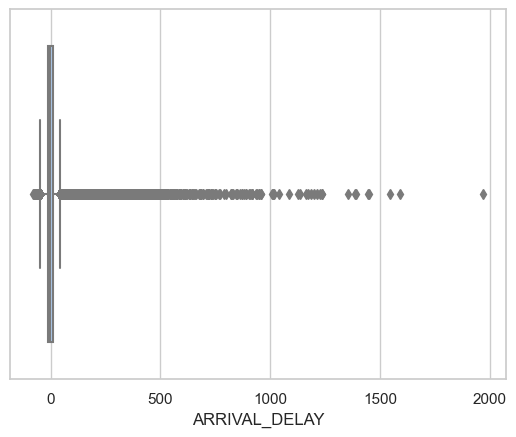

In [48]:
sns.boxplot(data=flights_df, x="ARRIVAL_DELAY")

Let's improve this basic boxplot.

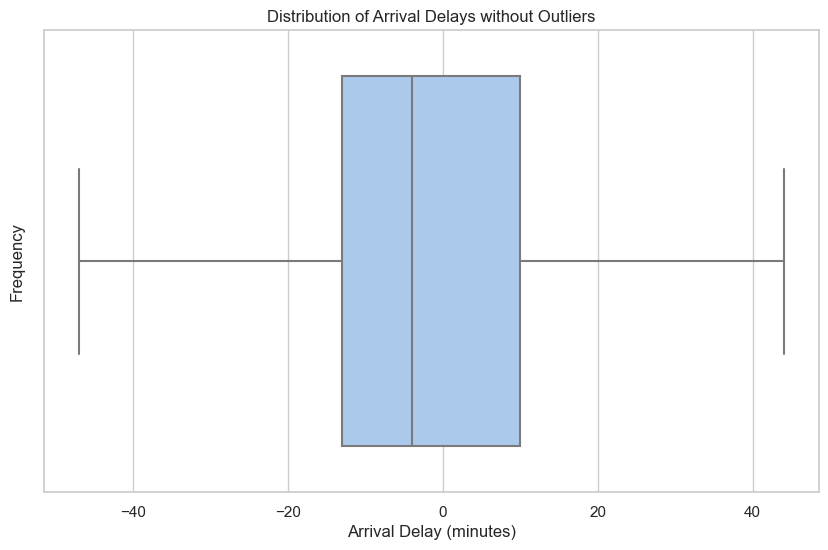

In [49]:
# Set Seaborn theme and palette
sns.set_theme(style="whitegrid", palette="pastel")

# Increase figure size
plt.figure(figsize=(10, 6))

# Create a boxplot with outliers removed
sns.boxplot(data=flights_df, x="ARRIVAL_DELAY", showfliers=False)

# Adjust axis labels and title
plt.title('Distribution of Arrival Delays without Outliers')
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

Another way to visualize the distribution of a the data is a histogram. Let's plot a histogram of the distance.

<AxesSubplot:xlabel='DISTANCE', ylabel='Count'>

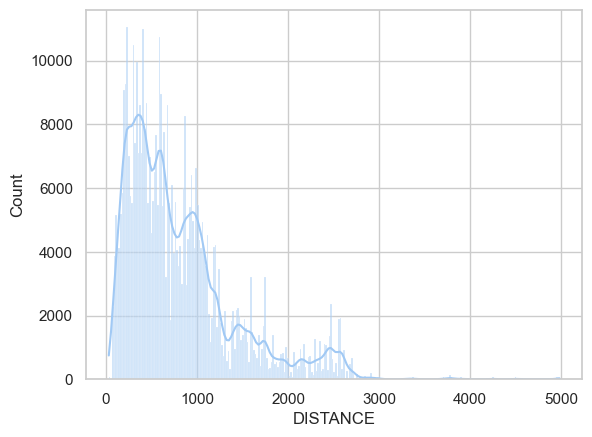

In [50]:
sns.histplot(data=flights_df, x="DISTANCE", kde=True)

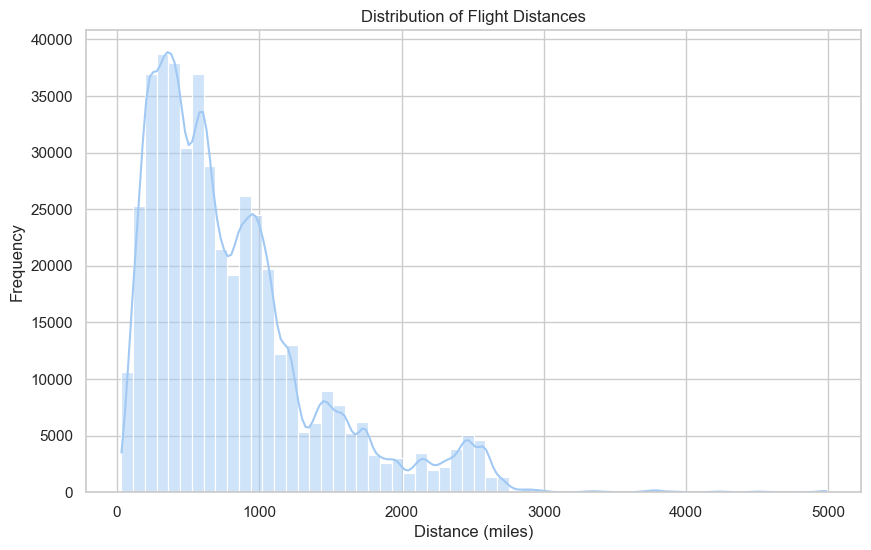

In [51]:
# Set Seaborn theme and palette
sns.set_theme(style="whitegrid", palette="pastel")

# Increase figure size
plt.figure(figsize=(10, 6))

# Create a histogram with KDE
sns.histplot(data=flights_df, x="DISTANCE", kde=True, bins=60)

# Adjust axis labels and title
plt.title('Distribution of Flight Distances')
plt.xlabel('Distance (miles)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

### Visualize Data

We want to answer the following question: Which airline has the best on-time performance? <br>
There a multiple factor that we need to consider to answer this question fully:
- The amount of flights
- The amount of on-time flights
- The total disctance of the flights

First we need to calculate this separat factors and visualize it afterwards in a scatterplot.

In [52]:
# Calculate total distance flown by each airline
total_distance = flights_df.groupby('AIRLINE')['DISTANCE'].sum()
total_distance = total_distance.reset_index()
total_distance = total_distance.rename(columns={"DISTANCE":"total_distance"})

total_distance

,AIRLINE,total_distance
0,Alaska Airlines Inc.,15669210
1,American Airlines Inc.,46329562
2,American Eagle Airlines Inc.,11984320
3,Atlantic Southeast Airlines,22358525
4,Delta Air Lines Inc.,54695097
5,Frontier Airlines Inc.,6382395
6,Hawaiian Airlines Inc.,3982192
7,JetBlue Airways,21701044
8,Skywest Airlines Inc.,22493655
9,Southwest Airlines Co.,70734675


In [53]:
# Calculate the number of flights for each airline
total_flights = flights_df.groupby('AIRLINE')['DISTANCE'].count()
total_flights = total_flights.reset_index()
total_flights = total_flights.rename(columns={"DISTANCE":"total_flights"})

total_flights

,AIRLINE,total_flights
0,Alaska Airlines Inc.,13151
1,American Airlines Inc.,43074
2,American Eagle Airlines Inc.,27568
3,Atlantic Southeast Airlines,48084
4,Delta Air Lines Inc.,63676
5,Frontier Airlines Inc.,6735
6,Hawaiian Airlines Inc.,6408
7,JetBlue Airways,20482
8,Skywest Airlines Inc.,46655
9,Southwest Airlines Co.,98060


In [54]:
# Define which flights count as "on time"
delay_threshold = 5

# Calculate the number of on-time arrivals for each airline
on_time_arrivals = flights_df[flights_df['ARRIVAL_DELAY'] <= delay_threshold].groupby('AIRLINE')['ARRIVAL_DELAY'].count()
on_time_arrivals = on_time_arrivals.reset_index()
on_time_arrivals = on_time_arrivals.rename(columns={"ARRIVAL_DELAY":"on_time_arrivals"})

on_time_arrivals

,AIRLINE,on_time_arrivals
0,Alaska Airlines Inc.,9968
1,American Airlines Inc.,28958
2,American Eagle Airlines Inc.,15123
3,Atlantic Southeast Airlines,31945
4,Delta Air Lines Inc.,50808
5,Frontier Airlines Inc.,3810
6,Hawaiian Airlines Inc.,4616
7,JetBlue Airways,13494
8,Skywest Airlines Inc.,30198
9,Southwest Airlines Co.,69311


In [55]:
# Merge the total distance and on-time arrival data
merged_airlines = pd.merge(total_distance, total_flights, on='AIRLINE', how='inner')
merged_airlines = pd.merge(merged_airlines, on_time_arrivals, on='AIRLINE', how='inner')

merged_airlines

,AIRLINE,total_distance,total_flights,on_time_arrivals
0,Alaska Airlines Inc.,15669210,13151,9968
1,American Airlines Inc.,46329562,43074,28958
2,American Eagle Airlines Inc.,11984320,27568,15123
3,Atlantic Southeast Airlines,22358525,48084,31945
4,Delta Air Lines Inc.,54695097,63676,50808
5,Frontier Airlines Inc.,6382395,6735,3810
6,Hawaiian Airlines Inc.,3982192,6408,4616
7,JetBlue Airways,21701044,20482,13494
8,Skywest Airlines Inc.,22493655,46655,30198
9,Southwest Airlines Co.,70734675,98060,69311


In [56]:
# Calculate the punctuality rate (percentage of on-time arrivals)
merged_airlines['punctuality_rate'] = round((merged_airlines['on_time_arrivals'] / merged_airlines['total_flights']) * 100, 2)

merged_airlines

,AIRLINE,total_distance,total_flights,on_time_arrivals,punctuality_rate
0,Alaska Airlines Inc.,15669210,13151,9968,75.80
1,American Airlines Inc.,46329562,43074,28958,67.23
2,American Eagle Airlines Inc.,11984320,27568,15123,54.86
3,Atlantic Southeast Airlines,22358525,48084,31945,66.44
4,Delta Air Lines Inc.,54695097,63676,50808,79.79
5,Frontier Airlines Inc.,6382395,6735,3810,56.57
6,Hawaiian Airlines Inc.,3982192,6408,4616,72.03
7,JetBlue Airways,21701044,20482,13494,65.88
8,Skywest Airlines Inc.,22493655,46655,30198,64.73
9,Southwest Airlines Co.,70734675,98060,69311,70.68


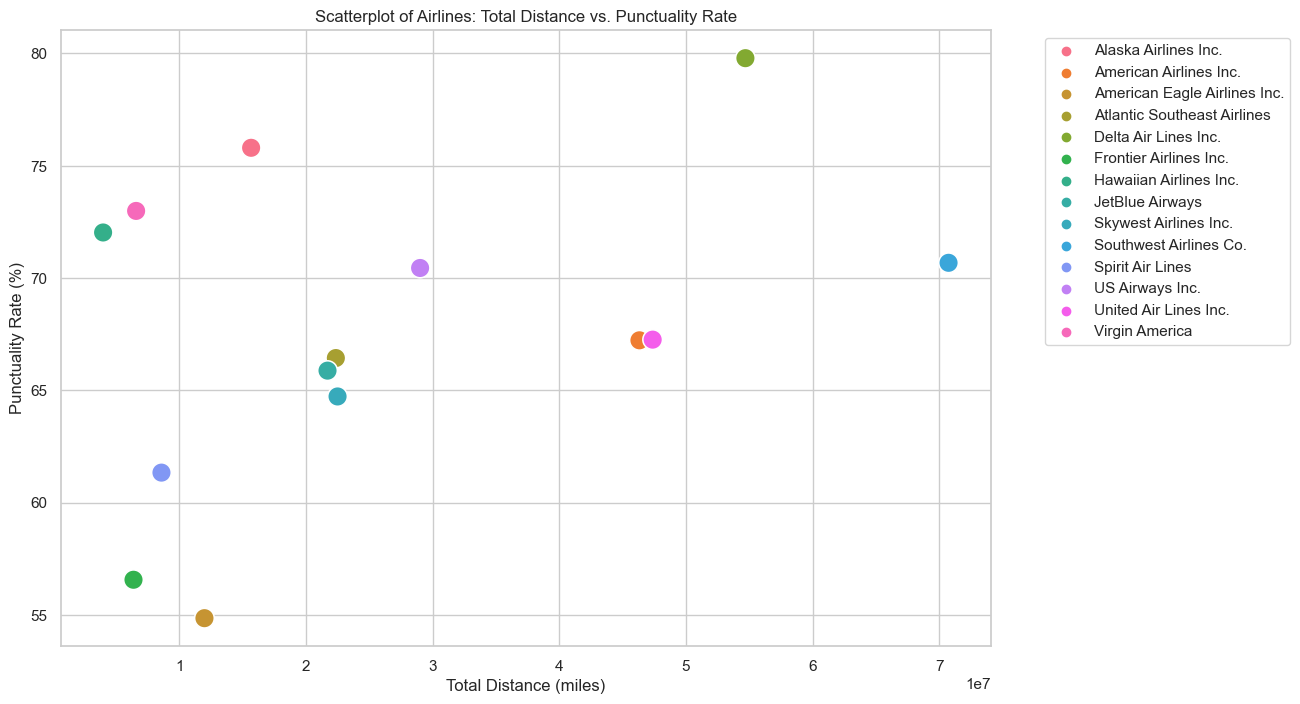

In [57]:
# Set Seaborn theme and palette
sns.set_theme(style="whitegrid", palette="pastel")

# Create a scatterplot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='total_distance', y='punctuality_rate', hue='AIRLINE', data=merged_airlines, s=200)

# Adjust axis labels and title
plt.title('Scatterplot of Airlines: Total Distance vs. Punctuality Rate')
plt.xlabel('Total Distance (miles)')
plt.ylabel('Punctuality Rate (%)')

# Show the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.show()

### Task

**Task 1:** Create a lineplot that shows the total amount of flights for each day of the week. First create the dataframe with the needed data and then plot it. You can find more information about the seaborn lineplot [here](https://seaborn.pydata.org/generated/seaborn.lineplot.html).

In [58]:
flights_per_weekday = flights_df.groupby('DAY_OF_WEEK')['DAY_OF_WEEK'].count()
flights_per_weekday = flights_per_weekday.reset_index(name='total_flights')
flights_per_weekday = flights_per_weekday.rename(columns={"DAY_OF_WEEK":"weekday"})

flights_per_weekday

,weekday,total_flights
0,1,61472
1,2,57138
2,3,60697
3,4,76284
4,5,79814
5,6,63138
6,7,58470


Text(0, 0.5, 'Total Flights')

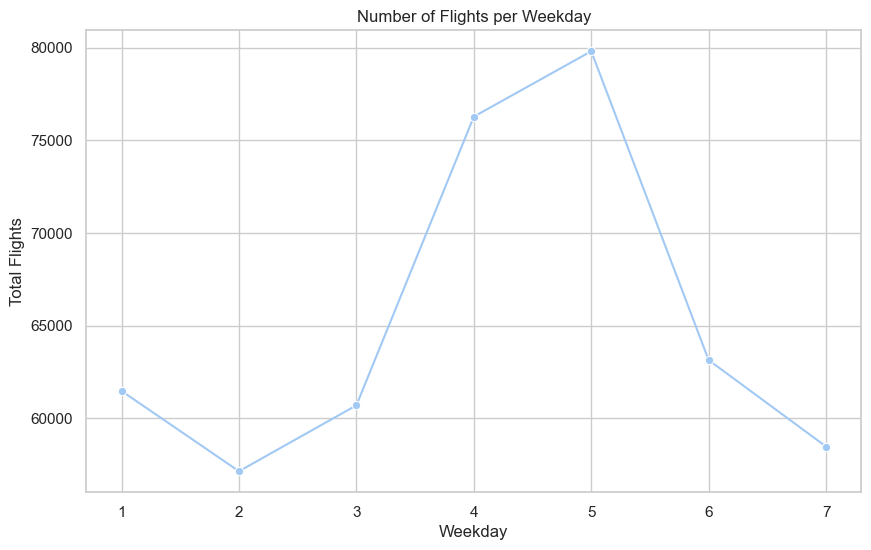

In [59]:
# Increase figure size
plt.figure(figsize=(10, 6))

# Create a lineplot with markers
sns.lineplot(data=flights_per_weekday, x="weekday", y="total_flights", marker='o')

# Adjust axis labels and title
plt.title('Number of Flights per Weekday')
plt.xlabel('Weekday')
plt.ylabel('Total Flights')

**Task 2:** Define your own simple reasearch question and try to answer it with a visualization.

Here are a few ideas:

1. **Airport Analysis:**
   - Which airports have the highest and lowest average departure delays?
   - How does the distribution of departure delays vary across different airports?
   - Visualize the number of flights departing from each airport. 

2. **Seasonal Trends:**
   - Explore if there are seasonal patterns in flight delays.
   - Visualize the distribution of delays in different seasons.

3. **Time of Day Analysis:**
   - How do departure delays vary throughout the day?
   - Visualize the distribution of departure delays for different times of the day.

4. **Flight Distance vs. Delay:**
   - Investigate if there's a relationship between flight distance and arrival delays.
   - Visualize scatterplots with flight distance on the x-axis and arrival delay on the y-axis.

5. **Route Analysis:**
    - Identify the most common flight routes.
    - Visualize the number of flights for different routes.
